### Pochodna, różniczka itp.

Wzory na pochodną każdy powinien znać albo umieć znaleźć w internecie.

Liczenie pochodnej jest automatyczne, w przeciwieństwie do liczenia całek, gdzie czasem trzeba pokombinować (albo wręcz nie ma jawnego wzoru na wynik całkowania - _intractable integral_ - przy czym całka istnieje).

Jeśli chcemy policzyć pochodną funkcji $f$, to mamy cztery przypadki:
* $f: \mathbb{R} \to \mathbb{R}$
* $f: \mathbb{R}^m \to \mathbb{R}$
* $f: \mathbb{R} \to \mathbb{R}^n$
* $f: \mathbb{R}^m \to \mathbb{R}^n$

przy czym tak naprawdę trzy pierwsze funkcje to szczególne przypadki czwartej (zachodzi $m=1$, $n=1$ lub obie równości jednocześnie).

Wartość pochodnej zawsze liczymy w konkretnym punkcie dziedziny funkcji $f$. W różnych punktach pochodna ma różną wartość. Wartością pochodnej w punkcie jest macierz, czyli odwzorowanie liniowe. To odwzorowanie ma za zadanie jak najlepiej przybliżać funkcję $f$ __w tym konkretnym punkcie dziedziny__. Jeśli funkcja $f$ ma skomplikowany kształt, to oczywiście w różnych punktach będzie przybliżana przez różne macierze.

$f(x + \Delta x) \cong f(x) + \dfrac{df}{dx}(x).\Delta x$

Po lewej stronie równości mamy funkcję $f$ w okolicy punktu $x$, po prawej stałą plus funkcję liniową. Prawa strona ma być liniowym przybliżeniem lewej.

---
### Po co w ogóle liczymy pochodne?

1. Chcemy mieć narzędzie do badania dowolnie skomplikowanych funkcji.
2. Dość dobrze rozumiemy funkcje liniowe (macierze).
3. Pochodna to przybliżenie skomplikowanej funkcji macierzą.

---
### Pochodna $f: \mathbb{R}^m \to \mathbb{R}^n$

Jeśli $f: \mathbb{R}^m \to \mathbb{R}^n$, to $\dfrac{df}{dx}$ jako funkcja liniowa musi również przekształcać $\mathbb{R}^m \to \mathbb{R}^n$, bo jest przybliżeniem $f$. W takim razie $\dfrac{df}{dx}$ jako macierz ma wymiar $n \times m$.

$x = (x_1, x_2, \ldots, x_m)$ - rozpisujemy $x$ po współrzędnych.

$f = (f_1, f_2, \ldots, f_n)$ - "rozbijamy" funkcję $f$ na $n$ funkcji (po współrzędnych wyniku).


$\dfrac{df}{dx}(x) = \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1}(x) & \dfrac{\partial f_1}{\partial x_2}(x) & \ldots & \dfrac{\partial f_1}{\partial x_m}(x) \\
    \dfrac{\partial f_2}{\partial x_1}(x) & \dfrac{\partial f_2}{\partial x_2}(x) & \ldots & \dfrac{\partial f_2}{\partial x_m}(x) \\
    \vdots & \vdots & \ddots & \vdots \\
    \dfrac{\partial f_n}{\partial x_1}(x) & \dfrac{\partial f_n}{\partial x_2}(x) & \ldots & \dfrac{\partial f_n}{\partial x_m}(x) \end{bmatrix}$


Zobaczmy na przykład funkcję $f: \mathbb{R}^2 \to \mathbb{R}^2$.

In [5]:
import numpy as np
# TU MOŻEMY ZMIENIĆ FUNKCJĘ
# POCHODNĄ TRZEBA POLICZYĆ RĘCZNIE!
F = lambda x1, x2: (x1**2*x2**3 + x1, np.exp(x1*x2)*x2)
dF = lambda x1, x2: (
    (2*x1*x2**3 + 1, 3*x2**2*x1**2),
    (np.exp(x1*x2)*x2**2, np.exp(x1*x2)*x2*x1 + np.exp(x1*x2)))
print(F(1, 2), "\n", dF(1, 2))

(9, 14.778112197861301) 
 ((17, 12), (29.556224395722602, 22.167168296791949))


In [10]:
# chociaż są narzędzia, także Pythonie, do liczenia symbolicznego
from sympy import *
import mpmath as mp

In [32]:
X1 = Symbol('X1')
X2 = Symbol('X2')
Y1 = X1 ** 2 * X2 ** 3 + X1
Y2 = exp(X1 * X2) * X2
print("Y  = [{}, {}]".format(Y1, Y2))
y1prime = (Y1.diff(X1), Y1.diff(X2))
y2prime = (Y2.diff(X1), Y2.diff(X2))
print("Y' = [[{}, {}]\n      [{}, {}]]".format(y1prime[0], y1prime[1], 
                                             y2prime[0], y2prime[1]))

Y  = [X1**2*X2**3 + X1, X2*exp(X1*X2)]
Y' = [[2*X1*X2**3 + 1, 3*X1**2*X2**2]
      [X2**2*exp(X1*X2), X1*X2*exp(X1*X2) + exp(X1*X2)]]


### Zadanie (niepunktowane)

Wymyślić inną funkcję $f: \mathbb{R}^2 \to \mathbb{R}^2$, policzyć jej pochodną, zobaczyć wykresy.

In [2]:
# F = lambda x1, x2: (..., ...)
# dF = lambda x1, x2: (
#     (..., ...),
#     (..., ...))

<IPython.core.display.Javascript object>


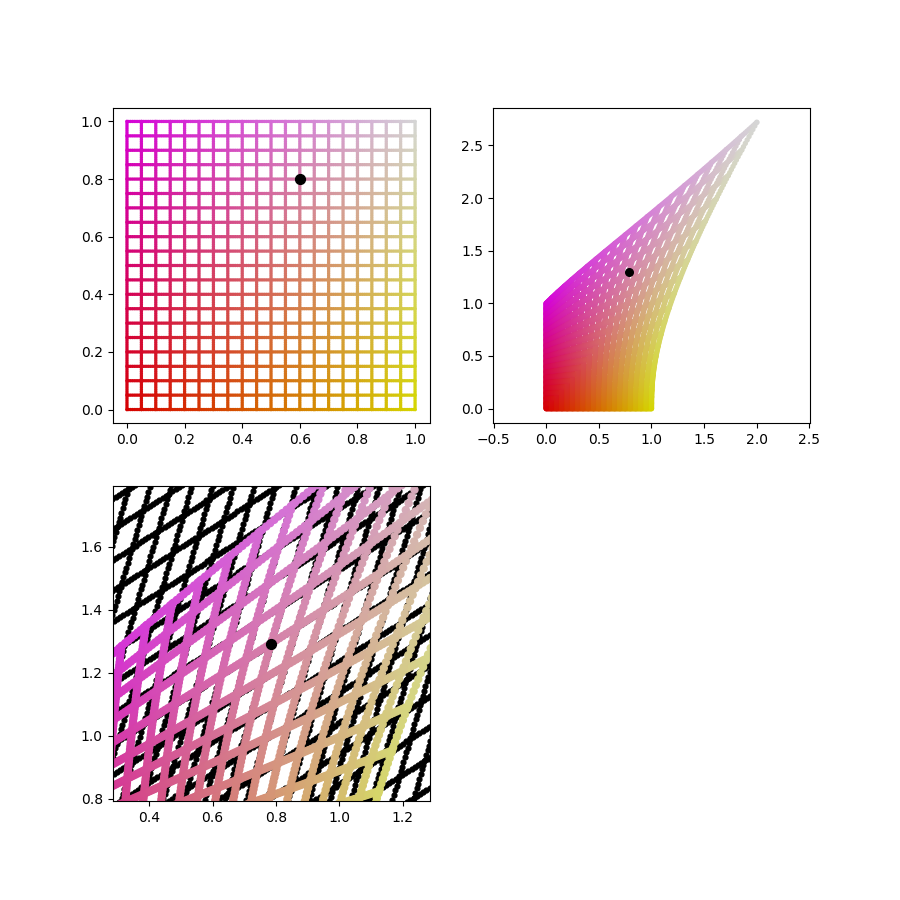

In [34]:
import numpy as np
import matplotlib
# interaktywne wykresy:
%matplotlib notebook
from matplotlib import pyplot as plt

# TU MOŻEMY ZMIENIĆ GĘSTOŚĆ SIATKI
n = 160
d = 20

# SIATKA
points = []
for j in range(d+1):
    points.append(
        np.vstack((
            np.array(range(n))/float(n-1),
            j*np.ones(n)/float(d))))
    points.append(
        np.vstack((
            j*np.ones(n)/float(d),
            np.array(range(n))/float(n-1))))
points = np.hstack(points)
colors = np.hstack((np.ones(shape=(points.shape[1],1)), points.T)) / 1.2

# TU MOŻEMY ZMIENIĆ PUNKT, W KTÓRYM POLICZYMY POCHODNĄ
x = (.6, .8)
Fx = F(*x)

fig = plt.figure(figsize=(9, 9))

ax = fig.add_subplot(2, 2, 1)
ax.axis("equal")
ax.scatter(*points, color=colors, s=2)
ax.scatter([x[0]], [x[1]], c='k', s=50)

F_points = np.array([F(x1, x2) for (x1, x2) in points.T]).T

ax = fig.add_subplot(2, 2, 2)
ax.axis("equal")
ax.scatter(*F_points, color=colors, s=8)
ax.scatter([Fx[0]], [Fx[1]], c='k', s=30)

dF_points = np.array([np.dot(dF(*x), (x1, x2)) + F(*x) for (x1, x2) in (points.T - (.5, .5))]).T

ax = fig.add_subplot(2, 2, 3)
ax.set_xlim(Fx[0]-.5, Fx[0]+.5)
ax.set_ylim(Fx[1]-.5, Fx[1]+.5)
ax.scatter(*dF_points, c='k', s=12)
ax.scatter(*F_points, color=colors, s=25)
ax.scatter([Fx[0]], [Fx[1]], c='k', s=50)


Wartość liczbowa $\dfrac{\partial f_j}{\partial x_k}(x)$ oznacza, __jak silny jest wpływ k-tej współrzędnej $x$ na j-tą współrzędną $f$__. Im większa na moduł jest to liczba, tym bardziej drobna zmiana argumentu $x_k$ zmieni wartość $f_j$.

W ten sposób można też numerycznie sprawdzać, czy dobrze policzyliśmy wzór na gradient.

### Zadanie (niepunktowane, dla chętnych)

Napisać sobie numeryczne sprawdzanie wzoru na gradient. Oczywiście wzór trzeba sprawdzić w każdym punkcie dziedziny, co jest niewykonalne - dobrą heurystyką jest wylosowanie dużej liczby punktów w interesującym nas obszarze.

### Gradient

W przypadku $f: \mathbb{R}^m \to \mathbb{R}$ pochodna jest macierzą o wymiarach $m \times 1$. Pochodną takiej funkcji oznacza się specjalnym symbolem $\nabla_x$. Interpretujemy tę macierz jako wektor i mówimy na niego __gradient__.

Gradient wyznacza kierunek najszybszego (lokalnie) wzrostu funkcji $f$. Wynika to z tego, że jeśli popatrzymy na gradient jako na odwzorowanie liniowe, to to odwzorowanie najszybciej rośnie w kierunku gradientu.

Norma (długość) gradientu mówi, jak szybki jest ten najszybszy wzrost.

### Zadanie (niepunktowane)

Pokazać, że jeśli popatrzymy na gradient jako na odwzorowanie liniowe, to to odwzorowanie liniowe (z czego w co ono prowadzi?) rośnie najszybciej w kierunku gradientu, a maleje najszybciej w kierunku przeciwnym.

A przede wszystkim - co to formalnie znaczy "najszybciej"?

In [4]:
# UŻYJMY TU M.IN. FUNKCJI TYPU exp(-(x-coś)^2) - TRZEBA SIĘ DO TAKICH FUNKCJI PRZYZWYCZAJAĆ

def G(a, b, c, d):
    return lambda x1, x2: np.exp(-(a*(x1-b)**2 + c*(x2-d)**2))

def dG_dx1(a, b, c, d):
    return lambda x1, x2: np.exp(-(a*(x1-b)**2 + c*(x2-d)**2))*(-2.)*a*(x1-b)

def dG_dx2(a, b, c, d):
    return lambda x1, x2: np.exp(-(a*(x1-b)**2 + c*(x2-d)**2))*(-2.)*c*(x2-d)

F = lambda x1, x2: \
    G(10., .2, 3., .4)(x1, x2) + G(6., .8, 12., .6)(x1, x2) + 1.5*(x2-.3)**3

dF = lambda x1, x2: (
    dG_dx1(10., .2, 3., .4)(x1, x2) + dG_dx1(6., .8, 12., .6)(x1, x2),
    dG_dx2(10., .2, 3., .4)(x1, x2) + dG_dx2(6., .8, 12., .6)(x1, x2) + 4.5*(x2-.3)**2)

<IPython.core.display.Javascript object>


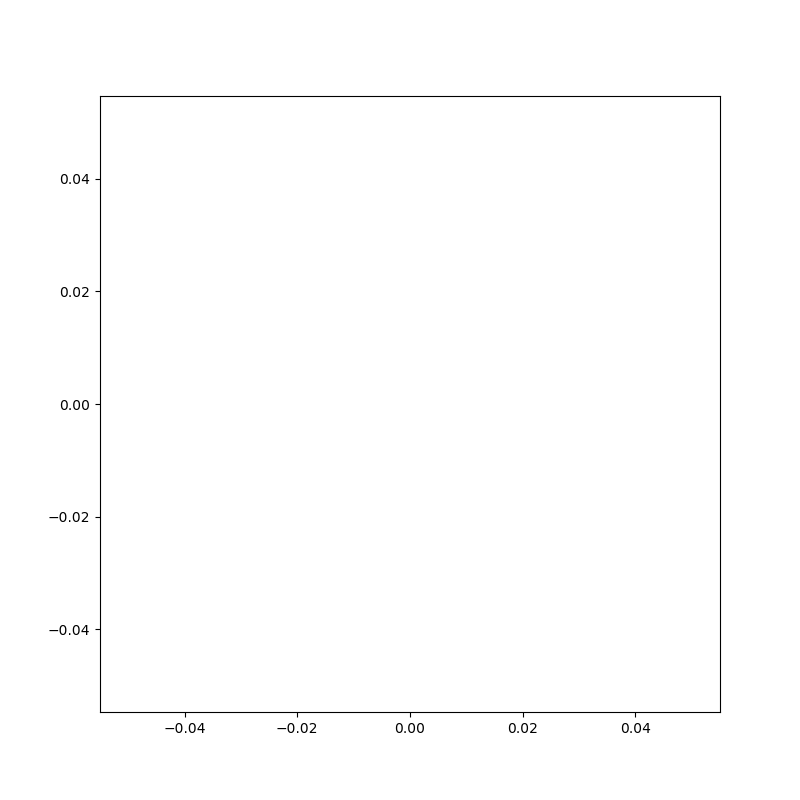

TypeError: Invalid dimensions for image data

In [37]:
n = 26
d = 25.

F_points = []
dF_arrows = []
for j in range(n):
    row = []
    for k in range(n):
        x1 = float(j)/d
        x2 = float(k)/d
        row.append(F(x1, x2))
        dF_arrows.append({
            "from": (x1, x2),
            "delta": dF(x1, x2)})
    F_points.append(row)
F_points = np.array(F_points)

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1, 1, 1)
ax.axis("equal")
ax.imshow(F_points.T, cmap='tab20b', interpolation='bicubic', 
          origin="lower", extent=(0, 1, 0, 1))
for i in range(len(dF_arrows)):
    d1 = dF_arrows[i]["delta"][0]
    d2 = dF_arrows[i]["delta"][1]
    #norm = np.sqrt(d1**2 + d2**2) # TU MOŻEMY PODZIELIĆ PRZEZ NORMĘ GRADIENTU, ŻE
    norm = 1. # TU MOŻEMY NIE DZIELIĆ PRZEZ NORMĘ GRADIENTU I ZOBACZYĆ, CO SIĘ STANIE
    d1 /= (norm * 60.)
    d2 /= (norm * 60.)
    ax.arrow(
        dF_arrows[i]["from"][0],
        dF_arrows[i]["from"][1],
        d1,
        d2,
        width=.001,
        head_width=0.006,
        head_length=0.012,
        length_includes_head=True)


Im gęściej są poziomice, tym dłuższy gradient.

Jeśli jesteśmy w jakimś punkcie dziedziny i chcemy się trochę przesunąć, aby w nowym punkcie wartość funkcji była jak największa, najefektywniej będzie pójść w kierunku wyznaczonym przez gradient. Jeśli chcemy zmniejszyć funkcję, trzeba pójść w kierunku przeciwnym.

Należy pamiętać, że gradient działa tylko lokalnie. Jeśli zrobimy zbyt duży krok, możemy wylądować w złym miejscu. Z drugiej strony im krótsze kroki, tym więcej ich musimy zrobić. W praktyce zaczyna się od długich kroków, a następnie z czasem zmniejsza ich długość, żeby zwiększyć precyzję (zmniejszanie _learning rate_).

### Uwaga praktyczna

Wszędzie tu oznaczaliśmy argumenty funkcji jako $x$. W praktyce modele ML przyjmują input oznaczany $x$ oraz mają parametry oznaczane $w$ lub $\theta$. Zakładamy, że input to pewien zbiór danych, którego nie możemy modyfikować, w przeciwieństwie do parametrów tego modelu.

Liczenie pochodnej wartości funkcji kosztu po parametrach $\theta$ ma nam umożliwić wykonanie drobnej modyfikacji tych parametrów, która w efekcie zmniejszy wartość funkcji kosztu. Ale __w jakim punkcie dziedziny__ obliczamy tę pochodną?

Odpowiedź to $(x, \theta)$. Proszę się nad tym zastanowić lub dopytać na wykładzie. 